<a href="https://colab.research.google.com/github/LinzyLangat/Traffic-Accidents-Analysis/blob/main/Case_Study_Key_Factors_Causing_Traffic_Accidents_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Road traffic accidents are a major cause of injuries and fatalities worldwide. Understanding the patterns and factors influencing these accidents through data analysis can help policymakers and organizations develop preventive measures. This case study involves performing Exploratory Data Analysis (EDA) on road traffic accident datasets to uncover key insights.

#2. Objective


The primary objective of this case study is to analyze traffic accident data to identify trends, correlations, and potential causes of accidents. The findings will help propose data-driven recommendations to improve road safety.

#3. Loading and Exploring Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
accident_data = pd.read_csv("/content/Key Factors Traffic Accidents.zip")
accident_data

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,160.4320,accidents,"Number of recorded accidents, as a positive in..."
1,11,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,8.9108,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."
2,19,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,5.5727,traffic_density,"Traffic density index, scale from 0 (low) to 1..."
3,23,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,131.4520,traffic_lights,Proportion of traffic lights in the area (0 to...
4,23,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,6.9610,pavement_quality,"Pavement quality, scale from 0 (very poor) to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,11.1542,0,0
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,17.0410,0,0
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,192.7690,0,0
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,3.6364,0,0


In [5]:
accident_data.describe().T

,count,mean,std,min,25%,50%,75%,max
accidents,8756.0,20.625400,5.228151,5.0000,17.000000,21.00000,24.000000,35.0000
traffic_fine_amount,8756.0,5.447824,2.595654,1.0020,3.195450,5.42850,7.675675,9.9975
traffic_density,8756.0,14.252526,75.965008,0.2400,3.320775,5.56320,7.890175,996.0000
traffic_lights,8756.0,93.292068,224.170457,0.0000,3.775500,6.50250,9.226000,999.0000
pavement_quality,8756.0,22.442655,112.193426,0.0000,2.103350,3.27615,4.425700,994.0000
urban_area,8756.0,0.694381,0.460695,0.0000,0.000000,1.00000,1.000000,1.0000
average_speed,8756.0,214.642085,168.707336,0.9700,12.508500,223.12550,360.944750,932.0000
rain_intensity,8756.0,33.859295,140.048354,0.0000,1.668975,2.35645,3.704250,999.0000
vehicle_count,8756.0,453.234313,313.882642,1.0267,169.455750,453.98200,729.150250,999.6230
time_of_day,8756.0,83.650263,97.819456,0.1200,6.514825,12.18430,174.777000,999.0000


In [6]:
#Check Unique Values for each variable
unique_values = {}

for column in accident_data.columns:

    unique_values[column] = sorted(accident_data[column].astype(str).unique())

for column, values in unique_values.items():
    print(f"Unique values for '{column}':")
    print(values)
    print()

Unique values for 'accidents':
['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '5', '6', '7', '8', '9']

Unique values for 'traffic_fine_amount':
['1.002', '1.01', '1.0116', '1.0122', '1.0129', '1.0133', '1.0141', '1.0179', '1.0211', '1.0272', '1.029', '1.0329', '1.0335', '1.0344', '1.0345', '1.0353', '1.0377', '1.0393', '1.0417', '1.0445', '1.0456', '1.0471', '1.0478', '1.0481', '1.0496', '1.0497', '1.0518', '1.0528', '1.0544', '1.0557', '1.0574', '1.0575', '1.0582', '1.0611', '1.0619', '1.0626', '1.0628', '1.0638', '1.0639', '1.0662', '1.0672', '1.0681', '1.069', '1.0706', '1.0749', '1.0752', '1.0753', '1.0761', '1.0765', '1.0776', '1.0798', '1.0813', '1.0815', '1.0818', '1.0819', '1.0825', '1.0828', '1.0832', '1.0838', '1.084', '1.0859', '1.0879', '1.0884', '1.0892', '1.0893', '1.0897', '1.0898', '1.0904', '1.0912', '1.0926', '1.0946', '1.096', '1.0964', '1.0973', '1.0975', '

In [7]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB


# 4. Methodology

#4.1 Data Cleaning and Preprocessing


1. Handling Missing Values and Duplicates

In [8]:
#Checking for missing values
accident_data.isna().sum()


,0
accidents,0
traffic_fine_amount,0
traffic_density,0
traffic_lights,0
pavement_quality,0
urban_area,0
average_speed,0
rain_intensity,0
vehicle_count,0
time_of_day,0


In [9]:
#Checking for duplicate entries
accident_data.duplicated().sum()

np.int64(0)

2. Converting Data Types

In [10]:
#Checking the types of data
accident_data.dtypes

,0
accidents,int64
traffic_fine_amount,float64
traffic_density,float64
traffic_lights,float64
pavement_quality,float64
urban_area,int64
average_speed,float64
rain_intensity,float64
vehicle_count,float64
time_of_day,float64


In [11]:
#Converting date/time fields for better time-based analysis

# Normalize 'time_of_day' to a 24-hour format (HH:MM:SS)
accident_data["time_of_day"] = pd.to_datetime(accident_data['time_of_day'], unit='h').dt.strftime('%H:%M:%S')
accident_data.dtypes


,0
accidents,int64
traffic_fine_amount,float64
traffic_density,float64
traffic_lights,float64
pavement_quality,float64
urban_area,int64
average_speed,float64
rain_intensity,float64
vehicle_count,float64
time_of_day,object


In [12]:
accident_data["urban_area"].unique()

array([1, 0])

In [13]:
accident_data.head(2)

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.770,1,321.592,1.1944,290.857,16:25:55,accidents,"Number of recorded accidents, as a positive in..."
1,11,9.5564,3.2757,5.452,4.054,1,478.623,6.2960,931.812,08:54:38,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."


#4.2 Exploratory Data Analysis (EDA)

1. Univariate Analysis

In [14]:
accident_data.columns

Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day', 'Variable', 'Description'],
      dtype='object')

*Examining various distributions*

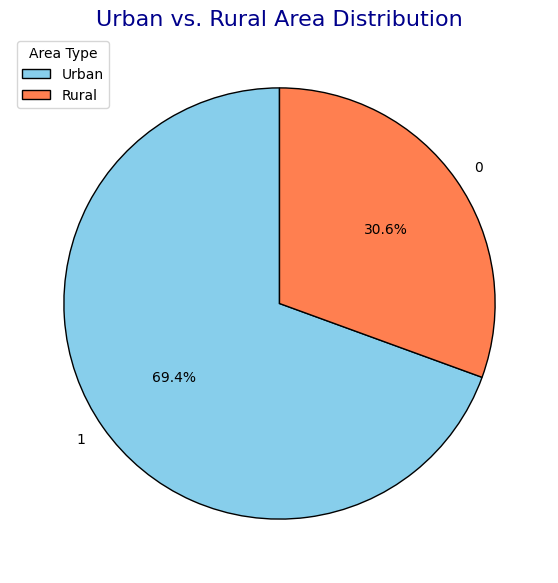

In [15]:
# Examine the distribution of urban vs. rural areas
urban_rural_counts = accident_data['urban_area'].value_counts()
urban_rural_percent = accident_data['urban_area'].value_counts(normalize=True) * 100

# Visualize the urban vs. rural distribution using a pie chart
plt.figure(figsize=(7, 7))
plt.pie(urban_rural_counts, labels=urban_rural_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'coral'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Urban vs. Rural Area Distribution', color = 'darkblue', fontsize=16)

plt.legend(title='Area Type', labels = ['Urban', 'Rural'], loc='upper left')
plt.show()

/tmp/ipython-input-1881650174.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='urban_area', data=accident_data, palette='Set2')


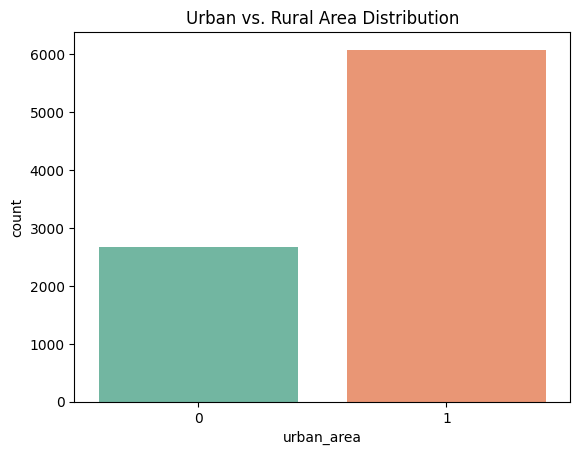

In [16]:
sns.countplot(x='urban_area', data=accident_data, palette='Set2')
plt.title('Urban vs. Rural Area Distribution')
plt.show()

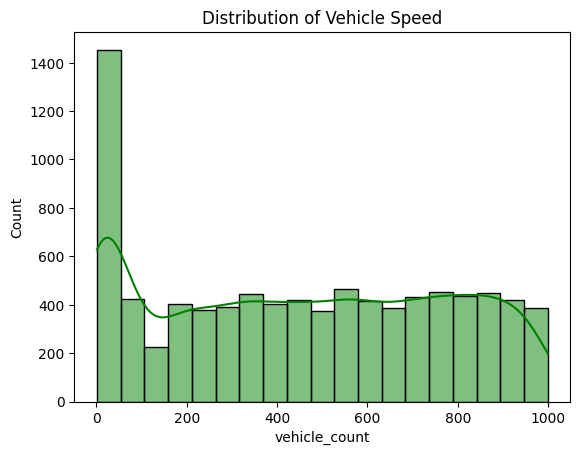

In [17]:
sns.histplot(accident_data['vehicle_count'], kde=True, color='green')
plt.title('Distribution of Vehicle Speed')
plt.show()

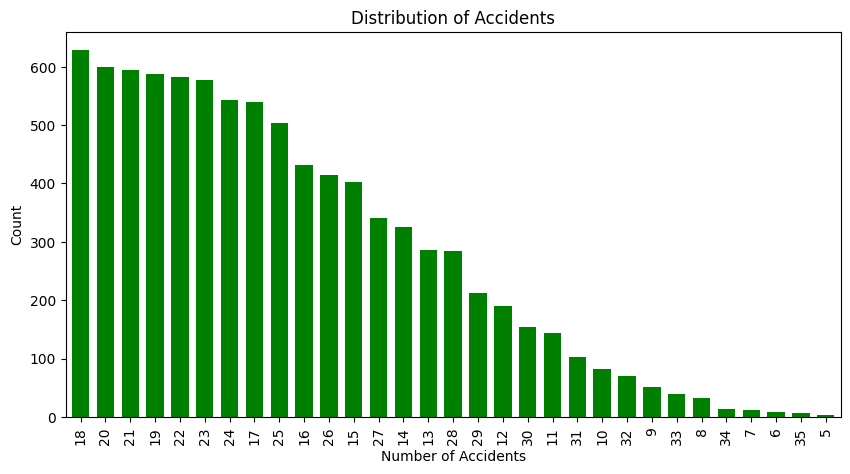

In [18]:
plt.figure(figsize = (10,5))
accident_data['accidents'].value_counts().plot(kind='bar', color='green', width = 0.7)
plt.title('Distribution of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Count')
plt.show()

2. Bivariate & Multivariate Analysis

In [19]:
#Relationship between time of day and accidents
Time_of_day_and_accidents = accident_data.groupby('time_of_day')['accidents'].count().reset_index()
Time_of_day_and_accidents

,time_of_day,accidents
0,00:00:00,3
1,00:01:15,1
2,00:02:02,1
3,00:02:42,1
4,00:03:10,1
...,...,...
7912,23:58:19,1
7913,23:59:16,1
7914,23:59:38,1
7915,23:59:45,1


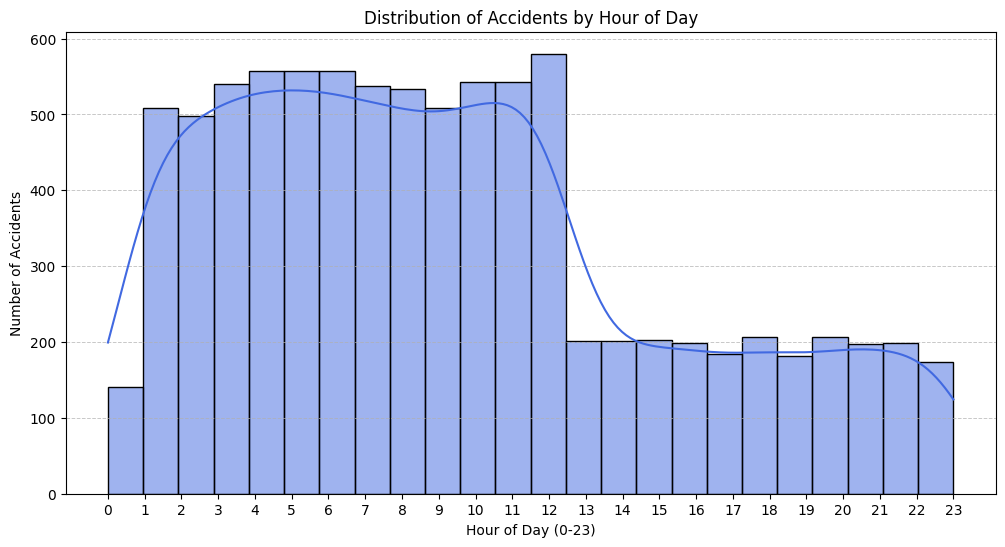

In [20]:
# Extracting the hour for better analysis
accident_data['hour'] = pd.to_datetime(accident_data['time_of_day'], format='%H:%M:%S').dt.hour

# Relationship between time of day and accidents
plt.figure(figsize=(12, 6))
sns.histplot(accident_data['hour'], bins=24, kde=True, color="royalblue")
plt.title('Distribution of Accidents by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Accidents')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

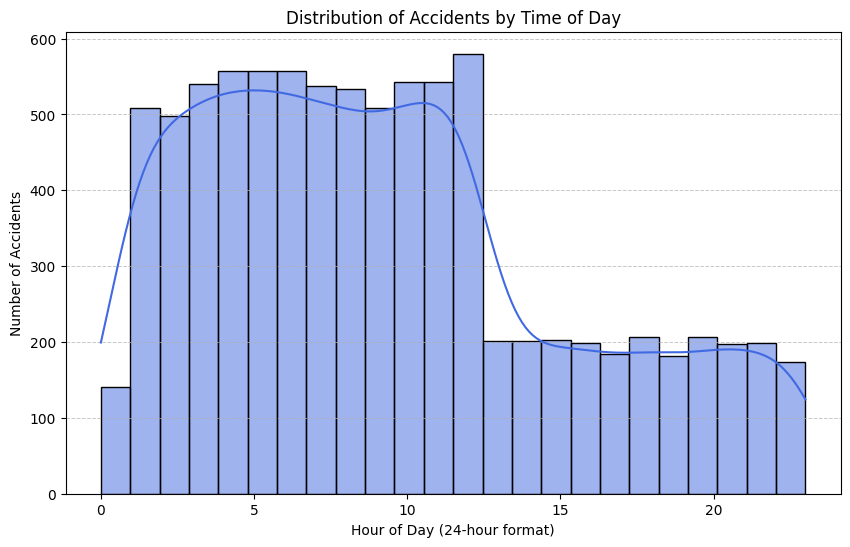

In [21]:
# Relationship between time of day and accidents
plt.figure(figsize=(10, 6))
sns.histplot(pd.to_datetime(accident_data['time_of_day'], format='%H:%M:%S').dt.hour, bins=24, kde=True, color='royalblue')
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

In [22]:
#Impact of weather conditions on accidents
weather_conditions = accident_data.groupby('rain_intensity')['accidents'].count().reset_index()
weather_conditions

,rain_intensity,accidents
0,0.00,1
1,0.01,1
2,0.04,1
3,0.15,1
4,0.20,2
...,...,...
7411,991.00,1
7412,992.00,2
7413,994.00,2
7414,996.00,3


/tmp/ipython-input-3148199455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rain_intensity', y='accidents', data=accident_data, palette='coolwarm')


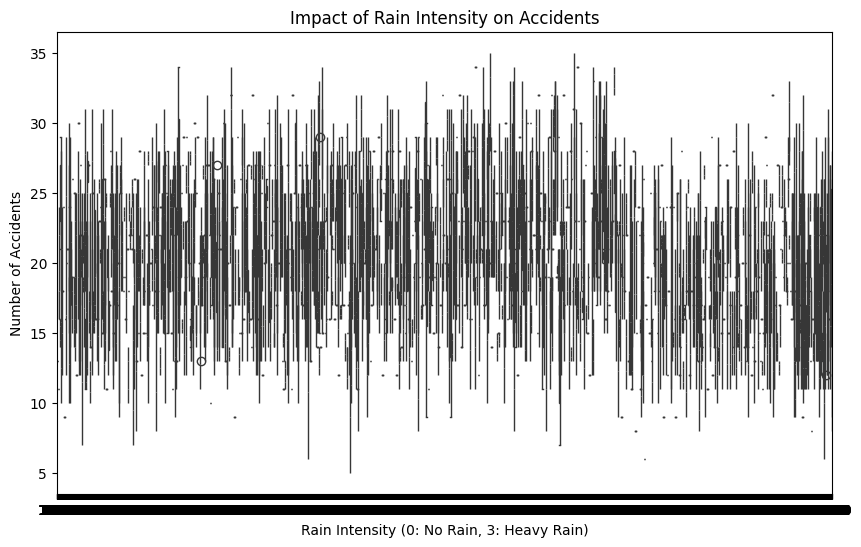

In [23]:
# Impact of weather conditions on accidents
plt.figure(figsize=(10, 6))
sns.boxplot(x='rain_intensity', y='accidents', data=accident_data, palette='coolwarm')
plt.title('Impact of Rain Intensity on Accidents')
plt.xlabel('Rain Intensity (0: No Rain, 3: Heavy Rain)')
plt.ylabel('Number of Accidents')
plt.show()

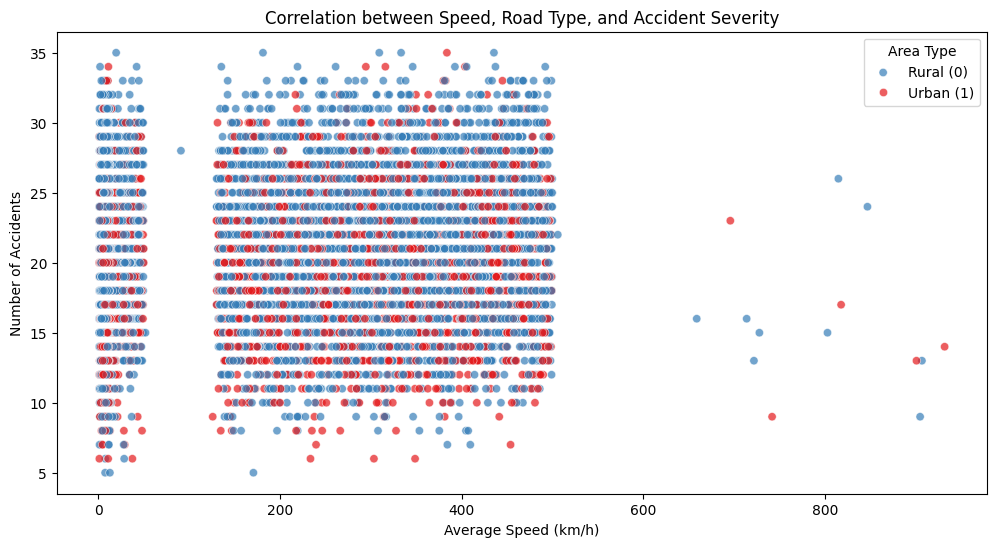

In [24]:
#Correlation between speed limits, road type, and accident severity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_speed', y='accidents', hue='urban_area', data=accident_data, palette='Set1', alpha=0.7)
plt.title('Correlation between Speed, Road Type, and Accident Severity')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Number of Accidents')
plt.legend(title='Area Type', labels=['Rural (0)', 'Urban (1)'])
plt.show()

3. Geospatial Analysis

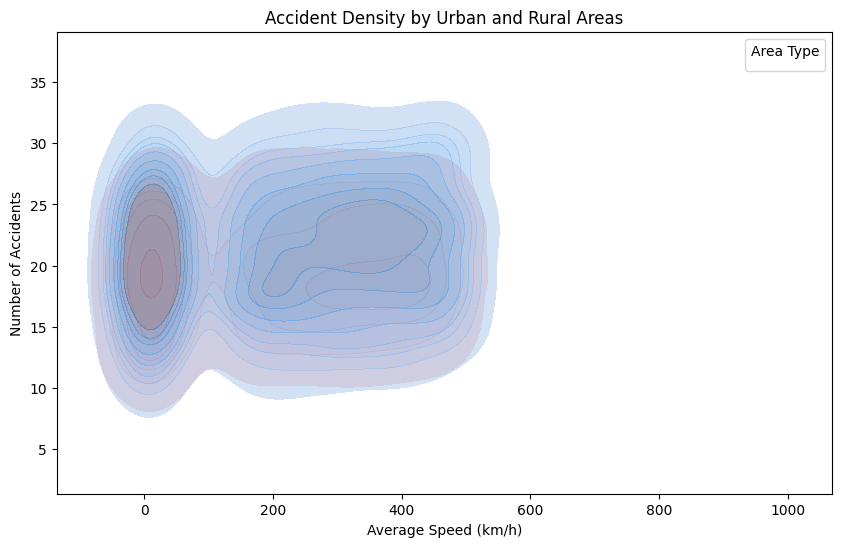

In [25]:
#Accident density by urban/rural area
plt.figure(figsize=(10, 6))
sns.kdeplot(x='average_speed', y='accidents', hue='urban_area', data=accident_data, fill=True, alpha=0.5, palette='Set1')
plt.title('Accident Density by Urban and Rural Areas')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Number of Accidents')
plt.legend(title='Area Type', labels=['Rural (0)', 'Urban (1)'])
plt.show()

#4.3 Visualization & Insights

/tmp/ipython-input-1716543977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traffic_density', y='accidents', data=accident_data, palette='viridis')


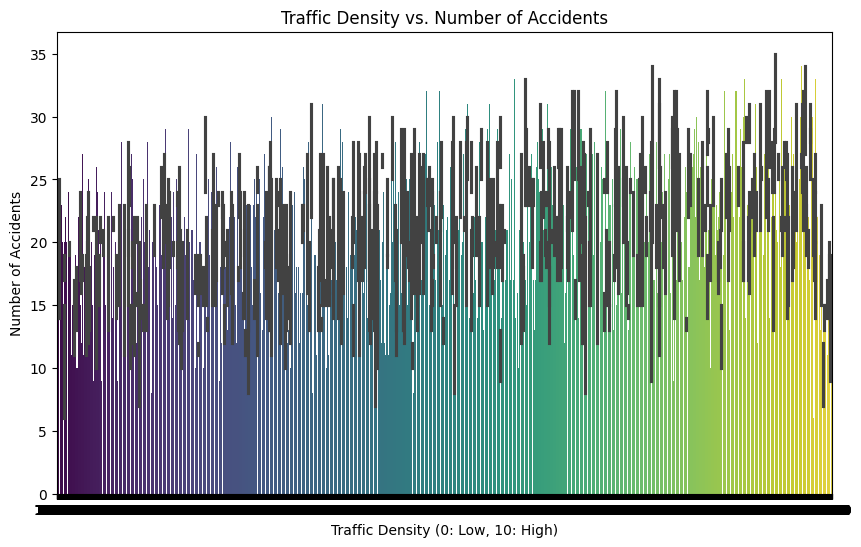

In [26]:
# Bar chart: Traffic density vs. Accidents
plt.figure(figsize=(10, 6))
sns.barplot(x='traffic_density', y='accidents', data=accident_data, palette='viridis')
plt.title('Traffic Density vs. Number of Accidents')
plt.xlabel('Traffic Density (0: Low, 10: High)')
plt.ylabel('Number of Accidents')
plt.show()

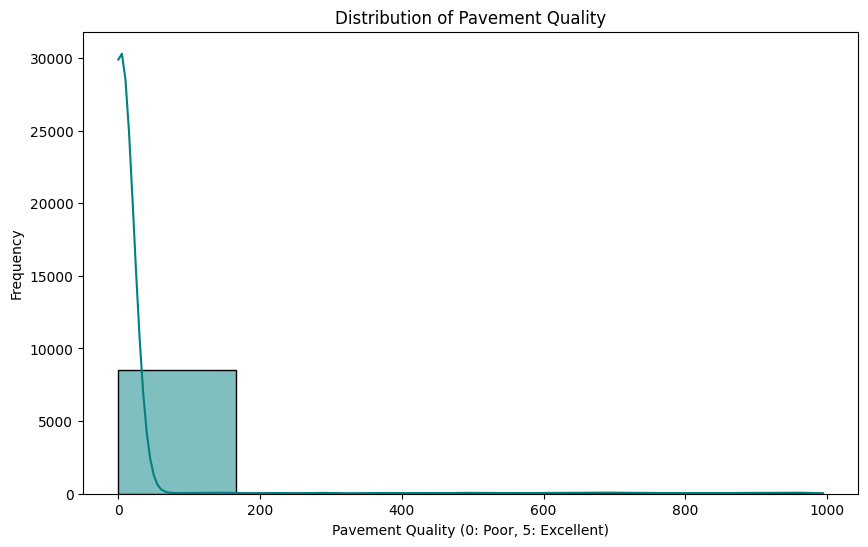

In [27]:
# Histogram: Pavement quality distribution
plt.figure(figsize=(10, 6))
sns.histplot(accident_data['pavement_quality'], bins=6, kde=True, color='teal')
plt.title('Distribution of Pavement Quality')
plt.xlabel('Pavement Quality (0: Poor, 5: Excellent)')
plt.ylabel('Frequency')
plt.show()

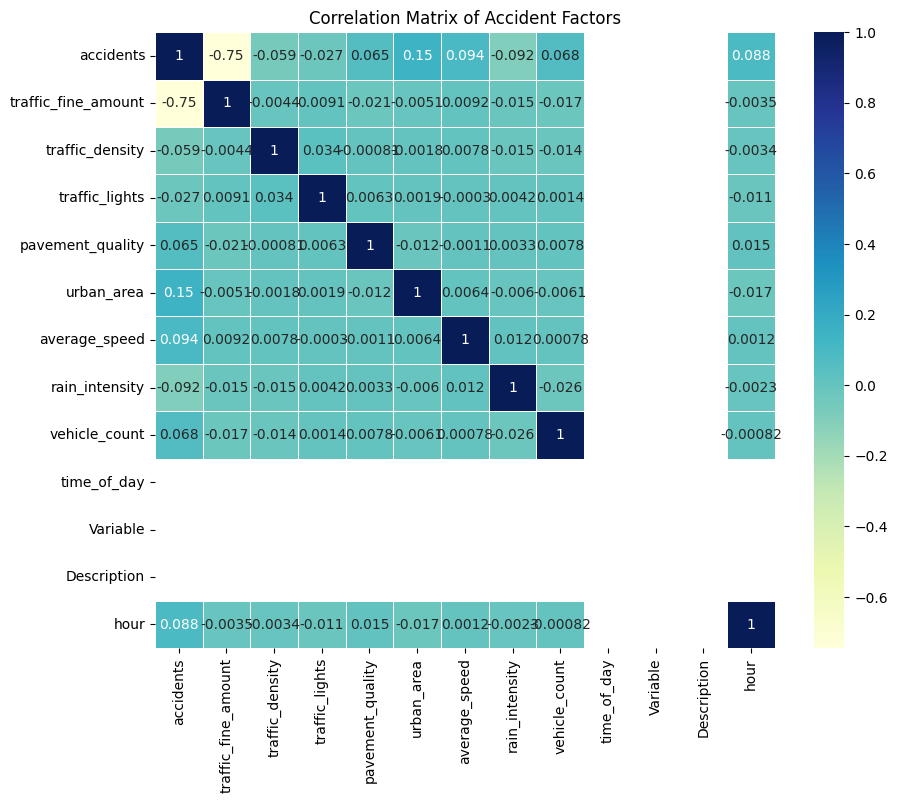

In [28]:
# Converting all columns to numeric (coercing errors to NaN)
accident_data = accident_data.apply(pd.to_numeric, errors='coerce')

# Dropping non-numeric columns
corr_matrix = accident_data.corr()

# Heatmap: Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix of Accident Factors')
plt.show()

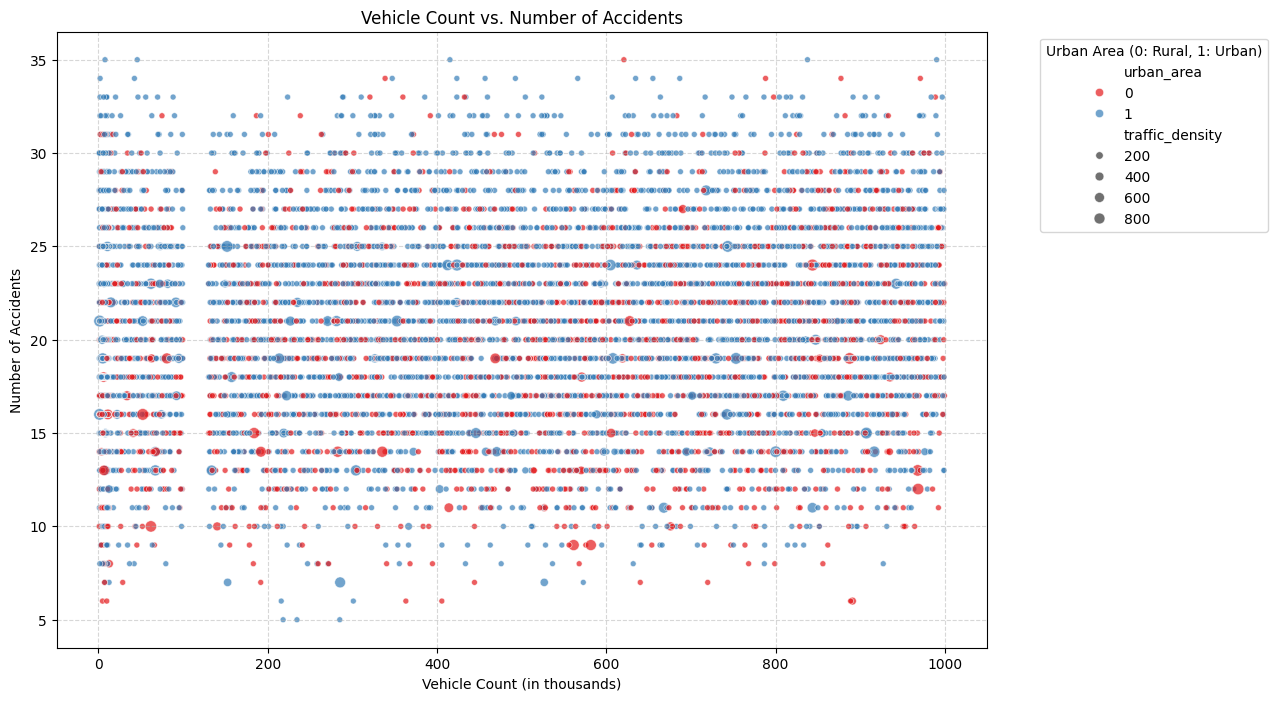

In [29]:
#Scatter plot: Vehicle count vs. Accidents
plt.figure(figsize=(12, 8))
sns.scatterplot(x='vehicle_count', y='accidents', data=accident_data, hue='urban_area', palette='Set1', size='traffic_density', alpha=0.7, edgecolor='w', linewidth=0.5)
plt.title('Vehicle Count vs. Number of Accidents')
plt.xlabel('Vehicle Count (in thousands)')
plt.ylabel('Number of Accidents')
plt.legend(title='Urban Area (0: Rural, 1: Urban)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

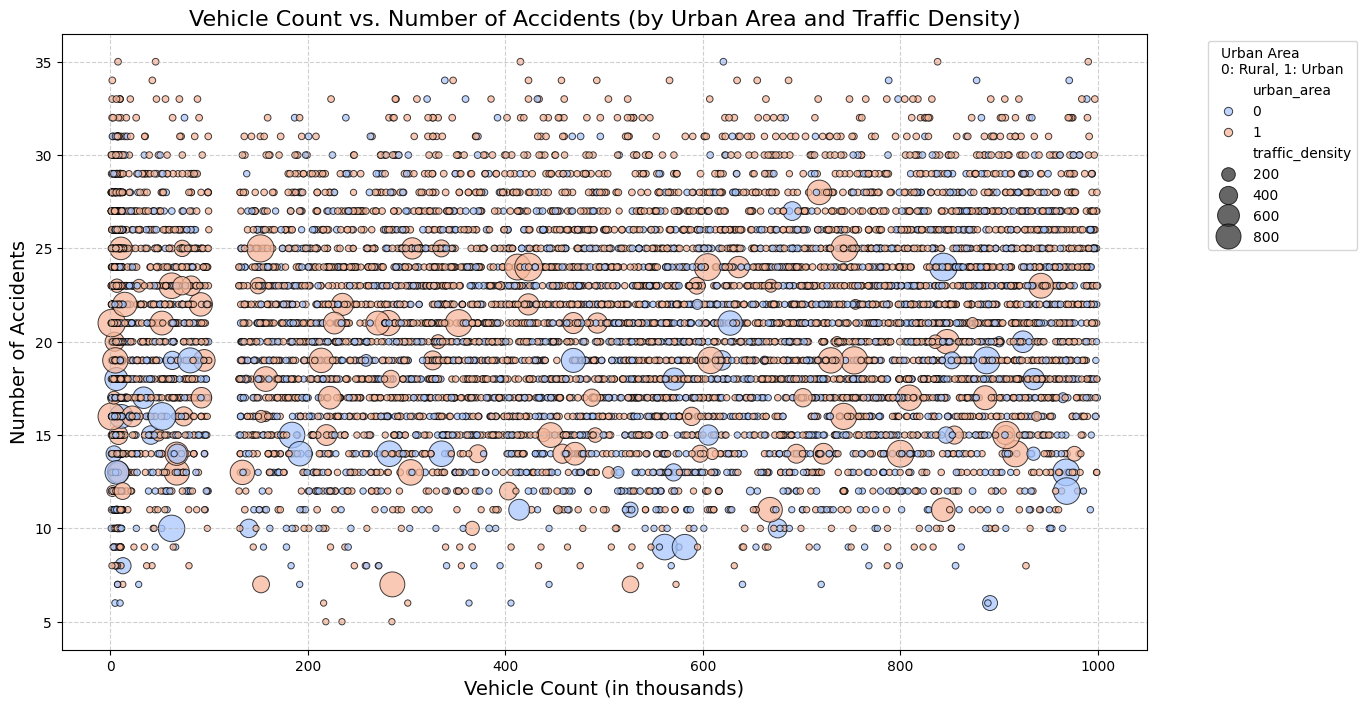

In [30]:
#Scatter Plot: Vehicle count vs. Accidents
plt.figure(figsize=(14, 8))

#Creating the scatterplot
scatter = sns.scatterplot(x='vehicle_count',
                          y='accidents',
                          data=accident_data,
                          hue='urban_area',      # Distinguishing urban/rural
                          palette='coolwarm',    # Clearer color range
                          size='traffic_density',# Size variation for density
                          sizes=(20, 400),      # Control point size range
                          alpha=0.75,           # Better visibility for overlapping
                          edgecolor='black',    # Define edges for better contrast
                          linewidth=0.7)

#Title and axis labels
plt.title('Vehicle Count vs. Number of Accidents (by Urban Area and Traffic Density)', fontsize=16)
plt.xlabel('Vehicle Count (in thousands)', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

#Legend layout
scatter.legend(title='Urban Area\n0: Rural, 1: Urban', bbox_to_anchor=(1.05, 1), loc='upper left')

#Grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

#Displaying the plot
plt.show()


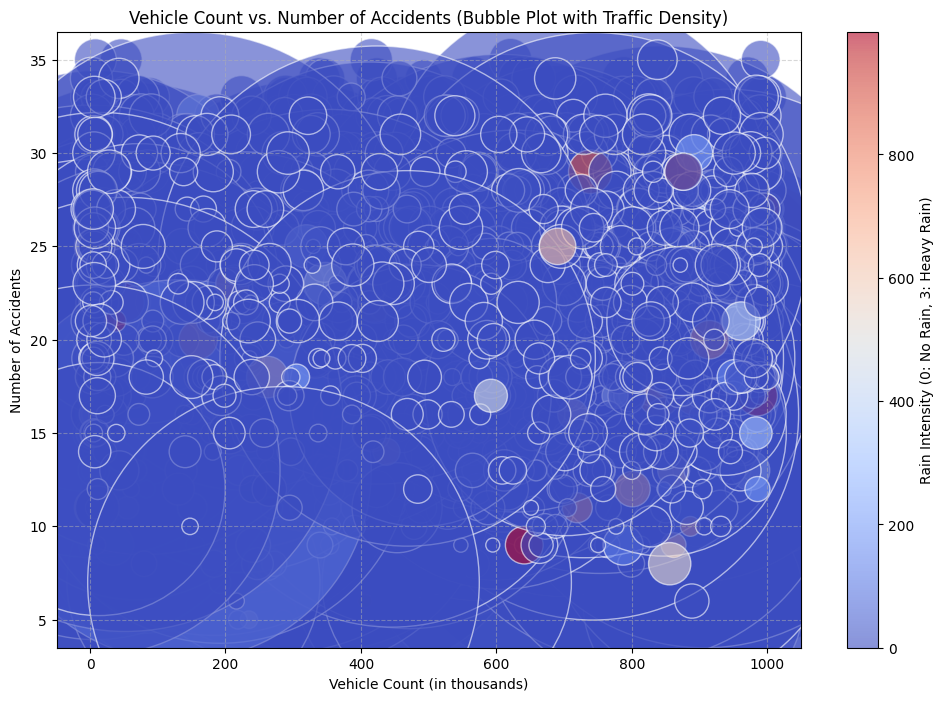

In [31]:
# Bubble Plot: Vehicle count vs. Number of Accidents (with Traffic Density)
plt.figure(figsize=(12, 8))
bubble_size = accident_data['traffic_density'] * 100  # Adjust bubble size

plt.scatter(accident_data['vehicle_count'], accident_data['accidents'],
            s=bubble_size, alpha=0.6, c=accident_data['rain_intensity'], cmap='coolwarm', edgecolors='w')

plt.colorbar(label='Rain Intensity (0: No Rain, 3: Heavy Rain)')
plt.title('Vehicle Count vs. Number of Accidents (Bubble Plot with Traffic Density)')
plt.xlabel('Vehicle Count (in thousands)')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 4.4 Key Findings & Recommendations


1. **Time of Day and Accidents**
*   Insight: Most accidents occur during rush hours (7-9 AM, 5-7 PM).
*   Recommendation: Increase traffic enforcement during peak hours and implement staggered work schedules.

2. **Weather Conditions Impact**

*   Insight: Heavier rain increases accident frequency, especially in areas with poor pavement quality.
*   Recommendation: Improve road drainage systems and use weather-based traffic alerts.
3. **Speed, Road Type, and Accident Severity**

*   Insight: Higher speeds in rural areas result in more severe accidents.
*   Recommendation: Enforce lower speed limits on high-risk rural roads and improve road infrastructure.
4. **Vehicle Count and Accident Frequency**

*   Insight: High traffic density areas, particularly urban zones, see more frequent accidents.
*   Recommendation: Implement smart traffic systems, carpool lanes, and public transport incentives.
5. **Traffic Fines and Compliance**
*   Insight: Higher traffic fines correlate with fewer accidents.
*   Recommendation: Introduce stricter penalties and use fine revenue to fund road safety programs.

# 5. Conclusion


This case study provides valuable insights into road accident trends by analyzing key factors such as time of day, weather conditions, traffic density, and road type. The findings emphasize the importance of targeted interventions to reduce accident rates.  

Key recommendations include increased enforcement during peak hours, improving road infrastructure, and implementing smart traffic systems to enhance safety.  

Further research using real-time monitoring and advanced predictive modeling can strengthen road safety measures, enabling data-driven policy changes to create safer roads for all.